In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_data.csv
/kaggle/input/titanic/test_data.csv


In [7]:
# Titanic KNN Classification (drop 'Sex')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer

# ----------------------------
# Load train CSV
# ----------------------------
df = pd.read_csv("/kaggle/input/titanic/train_data.csv")

# ----------------------------
# Drop 'Sex' column
# ----------------------------
df = df.drop(columns=['Sex'])

# ----------------------------
# Features and target
# ----------------------------
features = ['Age','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size']
X = df[features].copy()
y = df['Survived']

# ----------------------------
# Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# Handle missing numeric values
# ----------------------------
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=features)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=features)

# ----------------------------
# Scale features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----------------------------
# Ask user for k
# ----------------------------
k = int(input("Enter the value of k (e.g., 3 or 5): "))

# ----------------------------
# Train KNN
# ----------------------------
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# ----------------------------
# Predict
# ----------------------------
y_pred = knn.predict(X_test_scaled)

# ----------------------------
# Metrics
# ----------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nKNN Classification Metrics (k={k})")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Enter the value of k (e.g., 3 or 5):  3



KNN Classification Metrics (k=3)
Accuracy:  0.667
Precision: 0.574
Recall:    0.508
F1 Score:  0.539

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        98
           1       0.57      0.51      0.54        61

    accuracy                           0.67       159
   macro avg       0.64      0.64      0.64       159
weighted avg       0.66      0.67      0.66       159



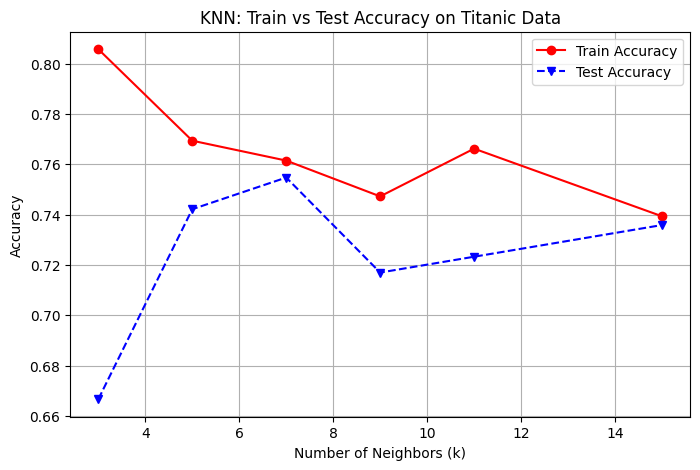

In [8]:
# Titanic KNN Classification + Train/Test Accuracy Plot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# ----------------------------
# Load train CSV
# ----------------------------
df = pd.read_csv("/kaggle/input/titanic/train_data.csv")

# Drop 'Sex'
df = df.drop(columns=['Sex'])

# Features and target
features = ['Age','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size']
X = df[features].copy()
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle missing numeric values
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=features)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=features)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----------------------------
# Test multiple k values
# ----------------------------
k_values = [3, 5, 7, 9, 11, 15]
train_acc = []
test_acc  = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Accuracy
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred  = knn.predict(X_test_scaled)
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# ----------------------------
# Plot train vs test accuracy
# ----------------------------
plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, 'r-o', label='Train Accuracy')
plt.plot(k_values, test_acc, 'b--v', label='Test Accuracy')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: Train vs Test Accuracy on Titanic Data")
plt.legend()
plt.grid(True)
plt.show()


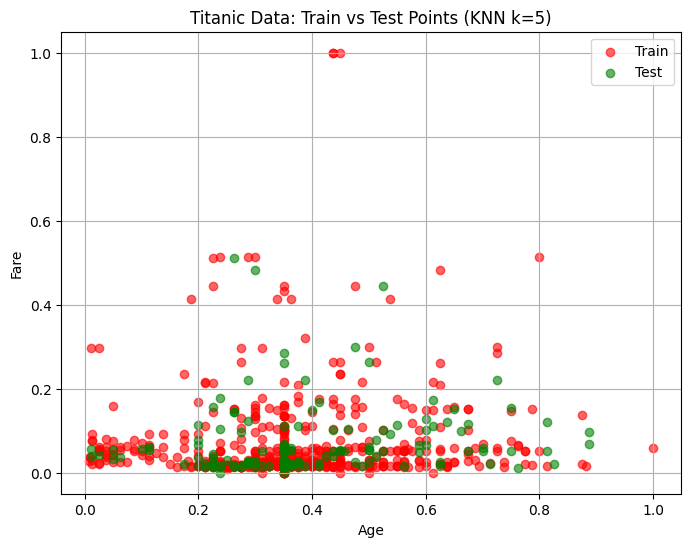

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# ----------------------------
# Load Titanic train CSV
# ----------------------------
df = pd.read_csv("/kaggle/input/titanic/train_data.csv")

# Drop 'Sex'
df = df.drop(columns=['Sex'])

# Features and target
features = ['Age','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size']
X = df[features].copy()
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle missing numeric values
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=features)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=features)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----------------------------
# Train KNN for example (k=5)
# ----------------------------
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# ----------------------------
# Plot train vs test data (using Age vs Fare)
# ----------------------------
plt.figure(figsize=(8,6))

# Get original (non-scaled) Age and Fare for plotting
X_train_plot = X_train[['Age','Fare']].values
X_test_plot  = X_test[['Age','Fare']].values

plt.scatter(X_train_plot[:,0], X_train_plot[:,1], c='red', label='Train', alpha=0.6)
plt.scatter(X_test_plot[:,0], X_test_plot[:,1], c='green', label='Test', alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title(f"Titanic Data: Train vs Test Points (KNN k={k})")
plt.legend()
plt.grid(True)
plt.show()


Enter k value for KNN:  7


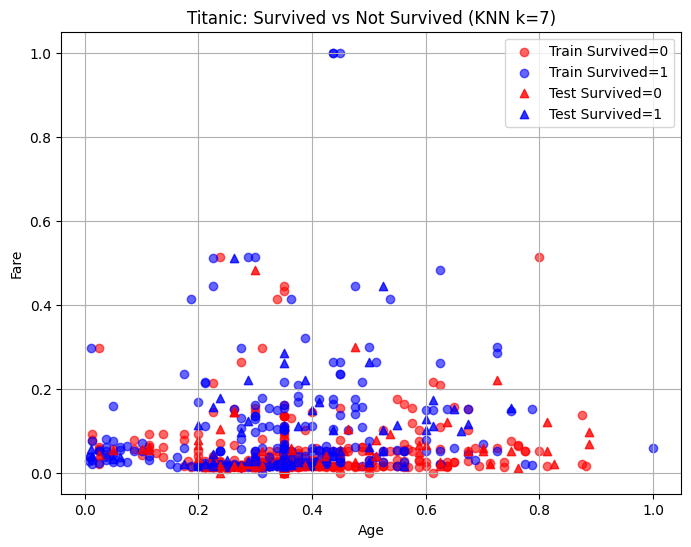

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# ----------------------------
# Load Titanic train CSV
# ----------------------------
df = pd.read_csv("/kaggle/input/titanic/train_data.csv")

# Drop 'Sex'
df = df.drop(columns=['Sex'])

# Features and target
features = ['Age','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size']
X = df[features].copy()
y = df['Survived'].copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle missing numeric values
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=features).reset_index(drop=True)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=features).reset_index(drop=True)

# Reset y indices too
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Train KNN
k = int(input("Enter k value for KNN: "))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# ----------------------------
# Plot Survived vs Not Survived
# ----------------------------
plt.figure(figsize=(8,6))

# Plot train data
for label, marker, color in zip([0,1], ['o','o'], ['red','blue']):
    plt.scatter(
        X_train['Age'][y_train==label],
        X_train['Fare'][y_train==label],
        c=color,
        marker=marker,
        label=f'Train Survived={label}',
        alpha=0.6
    )

# Plot test data
for label, marker, color in zip([0,1], ['^','^'], ['red','blue']):
    plt.scatter(
        X_test['Age'][y_test==label],
        X_test['Fare'][y_test==label],
        c=color,
        marker=marker,
        label=f'Test Survived={label}',
        alpha=0.8
    )

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title(f"Titanic: Survived vs Not Survived (KNN k={k})")
plt.legend()
plt.grid(True)
plt.show()
